# Hyperparameter Database Project


## Abstract

This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.

### Aim/Purpose of Research
This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.


### Methods Used :

Exploratory Data Analysis, H20 library. 

### About the dataset

Dataset has been taken from Kaggle : Travel Insurance Claims. This dataset displays information about the travel insurance claims filed by the candidate. 

#### Number of records: 
63,327 

#### Number of attributes:
11

#### Type of problem: 
Binary classification, regression

#### Type of variables:
Numeric, date, categorical , binary.

#### Target attribute:
Claim

In [1]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmplcmxw2zm
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmplcmxw2zm\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmplcmxw2zm\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    21 days, 17 hours and 4 minutes
H2O cluster name:           H2O_from_python_Ashmita_mng3aj
H2O cluster total nodes:    1
H2O cluster free memory:    3.522 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         AutoML, Amazon S3, Algos, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ------------------------------------------

In [2]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [4]:
# importing the dataset
df=pd.read_csv("travel insurance.csv", decimal = ',')

In [5]:
df.head()

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination Net Sales Commision (in value) Gender  Age  
0    No       186    MALAYSIA       -29                 9.57      F   81  
1    No       186    MALAYSIA       -29                 9.57      F   71  
2    No        65   AUSTRALIA     -49.5                 29.7    NaN   32  
3    No        60   AUSTRALIA     -39.6                23.76    NaN   32  
4    No        79       ITALY     -19.8                11.88    NaN   41

In [6]:
df.describe()

Duration           Age
count  63326.000000  63326.000000
mean      49.317074     39.969981
std      101.791566     14.017010
min       -2.000000      0.000000
25%        9.000000     35.000000
50%       22.000000     36.000000
75%       53.000000     43.000000
max     4881.000000    118.000000

In [7]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [8]:
df.info
df.shape

(63326, 11)

In [9]:
df.dtypes

Agency                  object
Agency Type             object
Distribution Channel    object
Product Name            object
Claim                   object
Duration                 int64
Destination             object
Net Sales               object
Commision (in value)    object
Gender                  object
Age                      int64
dtype: object

In [10]:
# Checking for null values
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [12]:
df.isnull().sum().sum()


45107

In [13]:
df = df.drop(['Gender'], axis=1)

In [14]:
df.head()

Agency    Agency Type Distribution Channel                     Product Name  \
0    CBH  Travel Agency              Offline               Comprehensive Plan   
1    CBH  Travel Agency              Offline               Comprehensive Plan   
2    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
3    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   
4    CWT  Travel Agency               Online  Rental Vehicle Excess Insurance   

  Claim  Duration Destination Net Sales Commision (in value)  Age  
0    No       186    MALAYSIA       -29                 9.57   81  
1    No       186    MALAYSIA       -29                 9.57   71  
2    No        65   AUSTRALIA     -49.5                 29.7   32  
3    No        60   AUSTRALIA     -39.6                23.76   32  
4    No        79       ITALY     -19.8                11.88   41

In [15]:
df.corr()

Duration       Age
Duration  1.000000  0.002468
Age       0.002468  1.000000

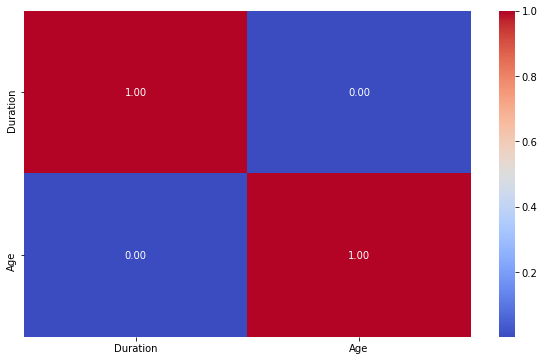

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### Categorical Encoding 

In [17]:
#one hot encode
agency={"Agency Type":{"Travel Agency":1,"Airlines":2}}
df.replace(agency, inplace=True)
df.head(10)

Agency  Agency Type Distribution Channel                     Product Name  \
0    CBH            1              Offline               Comprehensive Plan   
1    CBH            1              Offline               Comprehensive Plan   
2    CWT            1               Online  Rental Vehicle Excess Insurance   
3    CWT            1               Online  Rental Vehicle Excess Insurance   
4    CWT            1               Online  Rental Vehicle Excess Insurance   
5    JZI            2               Online                       Value Plan   
6    CWT            1               Online  Rental Vehicle Excess Insurance   
7    CWT            1               Online  Rental Vehicle Excess Insurance   
8    CWT            1               Online  Rental Vehicle Excess Insurance   
9    CWT            1               Online  Rental Vehicle Excess Insurance   

  Claim  Duration    Destination Net Sales Commision (in value)  Age  
0    No       186       MALAYSIA       -29                 9.57   81  
1    No       186       MALAYSIA       -29                 9.57   71  
2    No        65      AUSTRALIA     -49.5                 29.7   32  
3    No        60      AUSTRALIA     -39.6                23.76   32  
4    No        79          ITALY     -19.8                11.88   41  
5    No        66  UNITED STATES      -121                42.35   44  
6    No        47  UNITED STATES     -39.6                23.76   32  
7    No        63      AUSTRALIA    -108.9                65.34   29  
8    No        57       THAILAND     -19.8                11.88   44  
9    No       186      AUSTRALIA       -99                 59.4   37

In [18]:
#one hot encode
distribution_channel={"Distribution Channel ":{"Offline":1,"Online":2}}
df.replace(distribution_channel, inplace=True)
df.head(10)

Agency  Agency Type Distribution Channel                     Product Name  \
0    CBH            1              Offline               Comprehensive Plan   
1    CBH            1              Offline               Comprehensive Plan   
2    CWT            1               Online  Rental Vehicle Excess Insurance   
3    CWT            1               Online  Rental Vehicle Excess Insurance   
4    CWT            1               Online  Rental Vehicle Excess Insurance   
5    JZI            2               Online                       Value Plan   
6    CWT            1               Online  Rental Vehicle Excess Insurance   
7    CWT            1               Online  Rental Vehicle Excess Insurance   
8    CWT            1               Online  Rental Vehicle Excess Insurance   
9    CWT            1               Online  Rental Vehicle Excess Insurance   

  Claim  Duration    Destination Net Sales Commision (in value)  Age  
0    No       186       MALAYSIA       -29                 9.57   81  
1    No       186       MALAYSIA       -29                 9.57   71  
2    No        65      AUSTRALIA     -49.5                 29.7   32  
3    No        60      AUSTRALIA     -39.6                23.76   32  
4    No        79          ITALY     -19.8                11.88   41  
5    No        66  UNITED STATES      -121                42.35   44  
6    No        47  UNITED STATES     -39.6                23.76   32  
7    No        63      AUSTRALIA    -108.9                65.34   29  
8    No        57       THAILAND     -19.8                11.88   44  
9    No       186      AUSTRALIA       -99                 59.4   37

In [19]:
#one hot encode
gender={"Gender ":{"F":1,"M":2, np.nan:3}}
df.replace(gender, inplace=True)
df.head(10)

Agency  Agency Type Distribution Channel                     Product Name  \
0    CBH            1              Offline               Comprehensive Plan   
1    CBH            1              Offline               Comprehensive Plan   
2    CWT            1               Online  Rental Vehicle Excess Insurance   
3    CWT            1               Online  Rental Vehicle Excess Insurance   
4    CWT            1               Online  Rental Vehicle Excess Insurance   
5    JZI            2               Online                       Value Plan   
6    CWT            1               Online  Rental Vehicle Excess Insurance   
7    CWT            1               Online  Rental Vehicle Excess Insurance   
8    CWT            1               Online  Rental Vehicle Excess Insurance   
9    CWT            1               Online  Rental Vehicle Excess Insurance   

  Claim  Duration    Destination Net Sales Commision (in value)  Age  
0    No       186       MALAYSIA       -29                 9.57   81  
1    No       186       MALAYSIA       -29                 9.57   71  
2    No        65      AUSTRALIA     -49.5                 29.7   32  
3    No        60      AUSTRALIA     -39.6                23.76   32  
4    No        79          ITALY     -19.8                11.88   41  
5    No        66  UNITED STATES      -121                42.35   44  
6    No        47  UNITED STATES     -39.6                23.76   32  
7    No        63      AUSTRALIA    -108.9                65.34   29  
8    No        57       THAILAND     -19.8                11.88   44  
9    No       186      AUSTRALIA       -99                 59.4   37

In [20]:
df['Agency'] = pd.DataFrame(df['Agency'])
df['Agency']=df['Agency'].astype("category").cat.codes
df['Agency'].head(10)

0    3
1    3
2    6
3    6
4    6
5    9
6    6
7    6
8    6
9    6
Name: Agency, dtype: int8

In [21]:
df['Product Name'] = pd.DataFrame(df['Product Name'])
df['Product Name']=df['Product Name'].astype("category").cat.codes
df['Product Name'].head(10)

0    12
1    12
2    16
3    16
4    16
5    25
6    16
7    16
8    16
9    16
Name: Product Name, dtype: int8

In [22]:
df['Destination'] = pd.DataFrame(df['Destination'])
df['Destination']=df['Destination'].astype("category").cat.codes
df['Destination'].head(10)

0     79
1     79
2      4
3      4
4     61
5    140
6    140
7      4
8    129
9      4
Name: Destination, dtype: int16

In [23]:
df.head(10)

Agency  Agency Type Distribution Channel  Product Name Claim  Duration  \
0       3            1              Offline            12    No       186   
1       3            1              Offline            12    No       186   
2       6            1               Online            16    No        65   
3       6            1               Online            16    No        60   
4       6            1               Online            16    No        79   
5       9            2               Online            25    No        66   
6       6            1               Online            16    No        47   
7       6            1               Online            16    No        63   
8       6            1               Online            16    No        57   
9       6            1               Online            16    No       186   

   Destination Net Sales Commision (in value)  Age  
0           79       -29                 9.57   81  
1           79       -29                 9.57   71  
2            4     -49.5                 29.7   32  
3            4     -39.6                23.76   32  
4           61     -19.8                11.88   41  
5          140      -121                42.35   44  
6          140     -39.6                23.76   32  
7            4    -108.9                65.34   29  
8          129     -19.8                11.88   44  
9            4       -99                 59.4   37

In [24]:
df.corr()

Agency  Agency Type  Product Name  Duration  Destination  \
Agency        1.000000    -0.207529      0.138890 -0.076735    -0.208348   
Agency Type  -0.207529     1.000000      0.272308  0.111588     0.150909   
Product Name  0.138890     0.272308      1.000000 -0.048609    -0.069257   
Duration     -0.076735     0.111588     -0.048609  1.000000     0.074720   
Destination  -0.208348     0.150909     -0.069257  0.074720     1.000000   
Age           0.126357     0.221503      0.273164  0.002468    -0.041579   

                   Age  
Agency        0.126357  
Agency Type   0.221503  
Product Name  0.273164  
Duration      0.002468  
Destination  -0.041579  
Age           1.000000

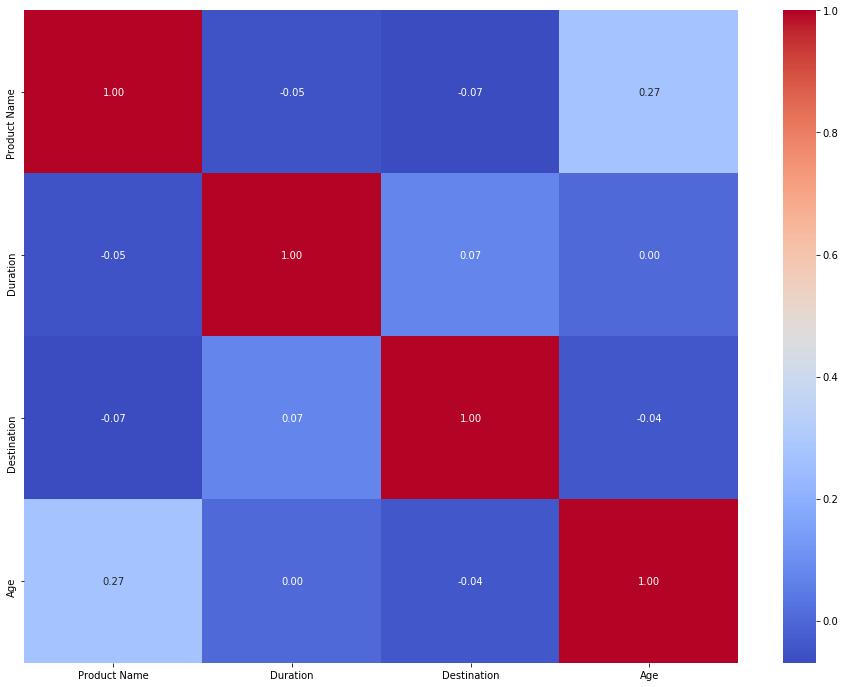

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### H20

In [26]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='Claim'
nthreads=1 
min_mem_size=6 
run_time=500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

Yurs3VOV1


In [27]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\Yurs3VOV1\logs   Yurs3VOV1_autoh2o_log.zip


In [28]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [29]:
metadata = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555966007.4603038, 'target': 'Claim', 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 500, 'run_id': 'Yurs3VOV1', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555966007.4603038, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\Yurs3VOV1', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [30]:
generate_md = pd.DataFrame.from_dict(metadata , orient='index')
generate_md

0
start_time                                               1.55597e+09
target                                                         Claim
server_path        C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path                                                       None
test_path                                                       None
max_models                                                         9
run_time                                                         500
run_id                                                     Yurs3VOV1
scale                                                          False
classification                                                 False
model_path                                                      None
balance                                                        False
balance_threshold                                                0.2
project                                                         None
end_time                                                 1.55597e+09
execution_time                                                     0
run_path           C:\Users\Ashmita\Desktop\Data Science Assignme...
nthreads                                                           1
min_mem_size                                                       6
analysis                                                           0

In [31]:
#dict_to_json(generate_md,n)
generate_md.to_csv('metadata_500.csv')

In [32]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

4


In [33]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:42994 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmp6ht99804
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmp6ht99804\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmp6ht99804\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:42994
Connecting to H2O server at http://127.0.0.1:42994 ... successful.


--------------------------  ------------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    21 days, 17 hours and 7 minutes
H2O cluster name:           H2O_from_python_Ashmita_uz12o5
H2O cluster total nodes:    1
H2O cluster free memory:    3.834 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:42994
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         AutoML, Amazon S3, Algos, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ------------------------------------------

In [34]:
df.to_csv('train_500.csv')

In [35]:
data_path='train_500.csv'


In [36]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
train_data.head(5)

C1 Agency Agency Type Distribution Channel Product Name Claim Duration Destination Net Sales Commision (in value) Age 
 
 
 0 3 1 Offline 12 No 186 79 -29 9.57 81 
 1 3 1 Offline 12 No 186 79 -29 9.57 71 
 2 6 1 Online 16 No 65 4 -49.5 29.7 32 
 3 6 1 Online 16 No 60 4 -39.6 23.76 32 
 4 6 1 Online 16 No 79 61 -19.8 11.88 41

In [38]:
target = 'Claim'

In [39]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [40]:
print(y)

Claim


In [41]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Product Name', 'Duration', 'Destination', 'Age', 'Distribution Channel', 'Net Sales', 'Commision (in value)']
Claim


In [42]:
# setup autoML
run_time=500
aml = H2OAutoML(max_runtime_secs=run_time)

In [43]:
logs_path = os.getcwd()
logfile = 'logs.txt'

In [44]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [45]:
# view the leaderboard
show_leader_board = aml.leaderboard
show_leader_board

model_id auc logloss mean_per_class_error rmse mse 
 
 
 GBM_2_AutoML_20190422_164836 0.825552 0.0656002 0.379442 0.118575 0.01406 
 GBM_grid_1_AutoML_20190422_164836_model_2 0.824705 0.0664736 0.377362 0.118041 0.0139338 
 GBM_grid_1_AutoML_20190422_164836_model_3 0.823147 0.0654931 0.368628 0.118062 0.0139386 
 GBM_1_AutoML_20190422_164836 0.822995 0.0682286 0.329364 0.121141 0.0146752 
 StackedEnsemble_AllModels_AutoML_20190422_164836 0.819312 0.0680914 0.351385 0.11932 0.0142373 
 GBM_3_AutoML_20190422_164836 0.81902 0.0665793 0.376714 0.119264 0.0142238 
 GBM_5_AutoML_20190422_164836 0.814706 0.0660615 0.382609 0.118405 0.0140198 
 StackedEnsemble_BestOfFamily_AutoML_20190422_164836 0.808414 0.0690085 0.401715 0.119791 0.0143498 
 GBM_grid_1_AutoML_20190422_164836_model_1 0.805362 0.0731707 0.342594 0.119613 0.0143073 
 GBM_4_AutoML_20190422_164836 0.804299 0.0683861 0.378547 0.120104 0.014425

In [46]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [47]:
aml_leaderboard_df

model_id       auc   logloss  \
0                        GBM_2_AutoML_20190422_164836  0.825552  0.065600   
1           GBM_grid_1_AutoML_20190422_164836_model_2  0.824705  0.066474   
2           GBM_grid_1_AutoML_20190422_164836_model_3  0.823147  0.065493   
3                        GBM_1_AutoML_20190422_164836  0.822995  0.068229   
4    StackedEnsemble_AllModels_AutoML_20190422_164836  0.819312  0.068091   
5                        GBM_3_AutoML_20190422_164836  0.819020  0.066579   
6                        GBM_5_AutoML_20190422_164836  0.814706  0.066061   
7   StackedEnsemble_BestOfFamily_AutoML_20190422_1...  0.808414  0.069009   
8           GBM_grid_1_AutoML_20190422_164836_model_1  0.805362  0.073171   
9                        GBM_4_AutoML_20190422_164836  0.804299  0.068386   
10  DeepLearning_grid_1_AutoML_20190422_164836_mod...  0.787324  0.160498   
11          GLM_grid_1_AutoML_20190422_164836_model_1  0.768482  0.067156   
12          GBM_grid_1_AutoML_20190422_164836_model_5  0.761254  0.085154   
13                       XRT_1_AutoML_20190422_164836  0.758017  0.105057   
14                       DRF_1_AutoML_20190422_164836  0.756645  0.107428   
15  DeepLearning_grid_1_AutoML_20190422_164836_mod...  0.750297  0.158634   
16              DeepLearning_1_AutoML_20190422_164836  0.739342  0.073041   
17  DeepLearning_grid_1_AutoML_20190422_164836_mod...  0.725582  0.075688   
18  DeepLearning_grid_1_AutoML_20190422_164836_mod...  0.721096  0.167189   
19          GBM_grid_1_AutoML_20190422_164836_model_4  0.574352  0.754583   

    mean_per_class_error      rmse       mse  
0               0.379442  0.118575  0.014060  
1               0.377362  0.118041  0.013934  
2               0.368628  0.118062  0.013939  
3               0.329364  0.121141  0.014675  
4               0.351385  0.119320  0.014237  
5               0.376714  0.119264  0.014224  
6               0.382609  0.118405  0.014020  
7               0.401715  0.119791  0.014350  
8               0.342594  0.119613  0.014307  
9               0.378547  0.120104  0.014425  
10              0.400242  0.120906  0.014618  
11              0.407805  0.118464  0.014034  
12              0.350287  0.138693  0.019236  
13              0.419520  0.121427  0.014745  
14              0.403893  0.122137  0.014918  
15              0.405232  0.120938  0.014626  
16              0.403724  0.119553  0.014293  
17              0.354244  0.119338  0.014241  
18              0.396453  0.120974  0.014635  
19              0.411726  0.189896  0.036060

In [48]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
print(model_set)
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

0                          GBM_2_AutoML_20190422_164836
1             GBM_grid_1_AutoML_20190422_164836_model_2
2             GBM_grid_1_AutoML_20190422_164836_model_3
3                          GBM_1_AutoML_20190422_164836
4      StackedEnsemble_AllModels_AutoML_20190422_164836
5                          GBM_3_AutoML_20190422_164836
6                          GBM_5_AutoML_20190422_164836
7     StackedEnsemble_BestOfFamily_AutoML_20190422_1...
8             GBM_grid_1_AutoML_20190422_164836_model_1
9                          GBM_4_AutoML_20190422_164836
10    DeepLearning_grid_1_AutoML_20190422_164836_mod...
11            GLM_grid_1_AutoML_20190422_164836_model_1
12            GBM_grid_1_AutoML_20190422_164836_model_5
13                         XRT_1_AutoML_20190422_164836
14                         DRF_1_AutoML_20190422_164836
15    DeepLearning_grid_1_AutoML_20190422_164836_mod...
16                DeepLearning_1_AutoML_20190422_164836
17    DeepLearning_grid_1_AutoML_20190422_164836

pandas.core.series.Series

In [49]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_2_AutoML_20190422_164836
GBM_grid_1_AutoML_20190422_164836_model_2
GBM_grid_1_AutoML_20190422_164836_model_3
GBM_1_AutoML_20190422_164836
StackedEnsemble_AllModels_AutoML_20190422_164836
GBM_3_AutoML_20190422_164836
GBM_5_AutoML_20190422_164836
StackedEnsemble_BestOfFamily_AutoML_20190422_164836
GBM_grid_1_AutoML_20190422_164836_model_1
GBM_4_AutoML_20190422_164836
DeepLearning_grid_1_AutoML_20190422_164836_model_3
GLM_grid_1_AutoML_20190422_164836_model_1
GBM_grid_1_AutoML_20190422_164836_model_5
XRT_1_AutoML_20190422_164836
DRF_1_AutoML_20190422_164836
DeepLearning_grid_1_AutoML_20190422_164836_model_4
DeepLearning_1_AutoML_20190422_164836
DeepLearning_grid_1_AutoML_20190422_164836_model_1
DeepLearning_grid_1_AutoML_20190422_164836_model_2
GBM_grid_1_AutoML_20190422_164836_model_4


In [50]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190422_164836', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190422_164836'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column':

In [51]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_500.json') 
hyperparameter_json(metadata,'meta_data_500.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [52]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     aml_leaderboard_df.to_csv('models_metrics_500.csv')

In [53]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_500.csv')

In [54]:
#mod_best=h2o.get_model(model_set[0])
#print(mod_best)

In [55]:

#mod_best._id

In [56]:
#for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     #mod_best.params
     #print(mod_best.params)
     

In [57]:
# h2o.get_model(mod_best)
#mod_best.params

In [58]:
#def dict_to_json(dct,n):
 # j = json.dumps(dct, indent=4)
  #f = open(n, 'w')
  #print(j, file=f)
  #f.close()

In [59]:
#hy_parameter = mod_best.params
#n='hyperparameter.json'

In [60]:
#dict_to_json(hy_parameter,n)

In [61]:
#for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
    # dict_to_json(hy_parameter,n)
     #aml_leaderboard_df.to_csv('models_501.csv')

### H20 Part 2

In [62]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

t98Izz7MB


In [63]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [64]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\Yurs3VOV1\t98Izz7MB\logs   t98Izz7MB_autoh2o_log.zip


In [68]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [70]:
metadata_1000 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_1000)

{'start_time': 1555966922.3204875, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\Yurs3VOV1', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1000, 'run_id': 't98Izz7MB', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555966922.3204875, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\Yurs3VOV1\\t98Izz7MB', 'nthreads': 1, 'min_mem_size': 3, 'analysis': 0}


In [71]:
generate_md = pd.DataFrame.from_dict(metadata_1000 , orient='index')
generate_md

0
start_time                                               1.55597e+09
target                                                          None
server_path        C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path                                                       None
test_path                                                       None
max_models                                                         9
run_time                                                        1000
run_id                                                     t98Izz7MB
scale                                                          False
classification                                                 False
model_path                                                      None
balance                                                        False
balance_threshold                                                0.2
project                                                         None
end_time                                                 1.55597e+09
execution_time                                                     0
run_path           C:\Users\Ashmita\Desktop\Data Science Assignme...
nthreads                                                           1
min_mem_size                                                       3
analysis                                                           0

In [72]:
generate_md.to_csv('metadata_100.csv')

In [73]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:40893 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpju3sw73q
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpju3sw73q\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpju3sw73q\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:40893
Connecting to H2O server at http://127.0.0.1:40893 ... successful.


--------------------------  ------------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    21 days, 17 hours and 22 minutes
H2O cluster name:           H2O_from_python_Ashmita_grfu1u
H2O cluster total nodes:    1
H2O cluster free memory:    3.522 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:40893
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         AutoML, Amazon S3, Algos, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ------------------------------------------

In [74]:
df.to_csv('train_1000.csv')

In [75]:
data_path='train_1000.csv'


In [76]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [77]:
train_data.head()

C1 Agency Agency Type Distribution Channel Product Name Claim Duration Destination Net Sales Commision (in value) Age 
 
 
 0 3 1 Offline 12 No 186 79 -29 9.57 81 
 1 3 1 Offline 12 No 186 79 -29 9.57 71 
 2 6 1 Online 16 No 65 4 -49.5 29.7 32 
 3 6 1 Online 16 No 60 4 -39.6 23.76 32 
 4 6 1 Online 16 No 79 61 -19.8 11.88 41 
 5 9 2 Online 25 No 66 140 -121 42.35 44 
 6 6 1 Online 16 No 47 140 -39.6 23.76 32 
 7 6 1 Online 16 No 63 4 -108.9 65.34 29 
 8 6 1 Online 16 No 57 129 -19.8 11.88 44 
 9 6 1 Online 16 No 186 4 -99 59.4 37

In [78]:
target = 'Claim'

In [79]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [80]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Product Name', 'Duration', 'Destination', 'Age', 'Distribution Channel', 'Net Sales', 'Commision (in value)']
Claim


In [81]:
# setup autoML
run_time=1000
aml = H2OAutoML(max_runtime_secs=run_time)

In [82]:
logs_path = os.getcwd()
logfile = 'logs_1000.txt'

In [83]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [84]:
# view leaderboard
lb = aml.leaderboard
lb

model_id auc logloss mean_per_class_error rmse mse 
 
 
 GBM_grid_1_AutoML_20190422_170306_model_4 0.831869 0.0655853 0.385927 0.117848 0.0138881 
 GBM_grid_1_AutoML_20190422_170306_model_5 0.831216 0.065604 0.385091 0.117854 0.0138895 
 GBM_1_AutoML_20190422_170306 0.828573 0.0666276 0.398484 0.119931 0.0143834 
 GBM_2_AutoML_20190422_170306 0.824037 0.0656928 0.370204 0.118705 0.014091 
 GBM_grid_1_AutoML_20190422_170306_model_2 0.823946 0.0716672 0.3319 0.119322 0.0142378 
 GBM_grid_1_AutoML_20190422_170306_model_8 0.819341 0.0654187 0.351725 0.118229 0.013978 
 StackedEnsemble_AllModels_AutoML_20190422_170306 0.819259 0.0676212 0.388327 0.11892 0.0141419 
 GBM_3_AutoML_20190422_170306 0.817349 0.0668775 0.374797 0.119403 0.0142571 
 StackedEnsemble_BestOfFamily_AutoML_20190422_170306 0.81642 0.0675888 0.373162 0.118851 0.0141256 
 GBM_5_AutoML_20190422_170306 0.816042 0.0660985 0.377229 0.118465 0.0140339

In [85]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [86]:
aml_leaderboard_df

model_id       auc   logloss  \
0           GBM_grid_1_AutoML_20190422_170306_model_4  0.831869  0.065585   
1           GBM_grid_1_AutoML_20190422_170306_model_5  0.831216  0.065604   
2                        GBM_1_AutoML_20190422_170306  0.828573  0.066628   
3                        GBM_2_AutoML_20190422_170306  0.824037  0.065693   
4           GBM_grid_1_AutoML_20190422_170306_model_2  0.823946  0.071667   
5           GBM_grid_1_AutoML_20190422_170306_model_8  0.819341  0.065419   
6    StackedEnsemble_AllModels_AutoML_20190422_170306  0.819259  0.067621   
7                        GBM_3_AutoML_20190422_170306  0.817349  0.066877   
8   StackedEnsemble_BestOfFamily_AutoML_20190422_1...  0.816420  0.067589   
9                        GBM_5_AutoML_20190422_170306  0.816042  0.066098   
10          GBM_grid_1_AutoML_20190422_170306_model_7  0.815689  0.071863   
11          GBM_grid_1_AutoML_20190422_170306_model_6  0.814883  0.067284   
12                       GBM_4_AutoML_20190422_170306  0.807264  0.068506   
13          GBM_grid_1_AutoML_20190422_170306_model_3  0.806778  0.067007   
14          GBM_grid_1_AutoML_20190422_170306_model_1  0.805643  0.075126   
15         GBM_grid_1_AutoML_20190422_170306_model_10  0.802727  0.074404   
16          GLM_grid_1_AutoML_20190422_170306_model_1  0.768482  0.067156   
17                       XRT_1_AutoML_20190422_170306  0.766842  0.099181   
18  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.764219  0.070877   
19                       DRF_1_AutoML_20190422_170306  0.761293  0.112851   
20  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.758210  0.072495   
21              DeepLearning_1_AutoML_20190422_170306  0.752528  0.071820   
22  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.751813  0.180201   
23  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.719629  0.083575   
24  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.716692  0.157927   
25  DeepLearning_grid_1_AutoML_20190422_170306_mod...  0.667873  0.115332   
26          GBM_grid_1_AutoML_20190422_170306_model_9  0.538338  2.438159   

    mean_per_class_error      rmse       mse  
0               0.385927  0.117848  0.013888  
1               0.385091  0.117854  0.013889  
2               0.398484  0.119931  0.014383  
3               0.370204  0.118705  0.014091  
4               0.331900  0.119322  0.014238  
5               0.351725  0.118229  0.013978  
6               0.388327  0.118920  0.014142  
7               0.374797  0.119403  0.014257  
8               0.373162  0.118851  0.014126  
9               0.377229  0.118465  0.014034  
10              0.328657  0.124732  0.015558  
11              0.354603  0.118224  0.013977  
12              0.378535  0.120412  0.014499  
13              0.394936  0.118687  0.014087  
14              0.401646  0.127147  0.016166  
15              0.358686  0.119819  0.014357  
16              0.407805  0.118464  0.014034  
17              0.445578  0.121266  0.014705  
18              0.351984  0.119565  0.014296  
19              0.427426  0.121926  0.014866  
20              0.392631  0.120959  0.014631  
21              0.417766  0.119958  0.014390  
22              0.412294  0.120982  0.014637  
23              0.411383  0.119959  0.014390  
24              0.428687  0.120973  0.014635  
25              0.435696  0.120612  0.014547  
26              0.462653  0.265986  0.070749

In [87]:
aml_leaderboard_df.to_csv('model_metrics_1000.csv' , sep=',')

In [89]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [90]:

mod_best._id

'GBM_grid_1_AutoML_20190422_170306_model_4'

In [91]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190422_170306_model_4',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190422_170306_model_4'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_1000.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_1000.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [92]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_170306_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_170306_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_170306_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_170306_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_170306_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_170306_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

In [93]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_grid_1_AutoML_20190422_170306_model_4
GBM_grid_1_AutoML_20190422_170306_model_5
GBM_1_AutoML_20190422_170306
GBM_2_AutoML_20190422_170306
GBM_grid_1_AutoML_20190422_170306_model_2
GBM_grid_1_AutoML_20190422_170306_model_8
StackedEnsemble_AllModels_AutoML_20190422_170306
GBM_3_AutoML_20190422_170306
StackedEnsemble_BestOfFamily_AutoML_20190422_170306
GBM_5_AutoML_20190422_170306
GBM_grid_1_AutoML_20190422_170306_model_7
GBM_grid_1_AutoML_20190422_170306_model_6
GBM_4_AutoML_20190422_170306
GBM_grid_1_AutoML_20190422_170306_model_3
GBM_grid_1_AutoML_20190422_170306_model_1
GBM_grid_1_AutoML_20190422_170306_model_10
GLM_grid_1_AutoML_20190422_170306_model_1
XRT_1_AutoML_20190422_170306
DeepLearning_grid_1_AutoML_20190422_170306_model_3
DRF_1_AutoML_20190422_170306
DeepLearning_grid_1_AutoML_20190422_170306_model_5
DeepLearning_1_AutoML_20190422_170306
DeepLearning_grid_1_AutoML_20190422_170306_model_6
DeepLearning_grid_1_AutoML_20190422_170306_model_2
DeepLearning_grid_1_AutoML_201904

In [94]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_170306_model_4', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_170306_model_4'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1000.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1000.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual

In [95]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1000.json') 
hyperparameter_json(metadata,'meta_data_1000.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [96]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_1000.csv')

### H20 Part 3

In [97]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

PVxu8FKke


In [98]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\hyperparameter-db-project-ds14\Python scripts\Yurs3VOV1\t98Izz7MB\PVxu8FKke\logs   PVxu8FKke_autoh2o_log.zip


In [99]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [100]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [101]:
metadata_1500 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata_1500)

{'start_time': 1555968866.3787594, 'target': None, 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\Yurs3VOV1\\t98Izz7MB', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 1500, 'run_id': 'PVxu8FKke', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555968866.3787594, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\hyperparameter-db-project-ds14\\Python scripts\\Yurs3VOV1\\t98Izz7MB\\PVxu8FKke', 'nthreads': 1, 'min_mem_size': 3, 'analysis': 0}


In [102]:
generate_md = pd.DataFrame.from_dict(metadata_1500 , orient='index')
generate_md

0
start_time                                               1.55597e+09
target                                                          None
server_path        C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path                                                       None
test_path                                                       None
max_models                                                         9
run_time                                                        1500
run_id                                                     PVxu8FKke
scale                                                          False
classification                                                 False
model_path                                                      None
balance                                                        False
balance_threshold                                                0.2
project                                                         None
end_time                                                 1.55597e+09
execution_time                                                     0
run_path           C:\Users\Ashmita\Desktop\Data Science Assignme...
nthreads                                                           1
min_mem_size                                                       3
analysis                                                           0

In [103]:
generate_md.to_csv("metadata_1500.csv" , sep=",")

In [104]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:28619 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmp5hayxdwm
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmp5hayxdwm\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmp5hayxdwm\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:28619
Connecting to H2O server at http://127.0.0.1:28619 ... successful.


--------------------------  ------------------------------------------
H2O cluster uptime:         03 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    21 days, 17 hours and 56 minutes
H2O cluster name:           H2O_from_python_Ashmita_287y5n
H2O cluster total nodes:    1
H2O cluster free memory:    3.522 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:28619
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         AutoML, Amazon S3, Algos, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ------------------------------------------

In [105]:
df.to_csv('train_1500.csv')

In [106]:
data_path = 'train_1500.csv'

In [107]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [108]:
train_data.head()

C1 Agency Agency Type Distribution Channel Product Name Claim Duration Destination Net Sales Commision (in value) Age 
 
 
 0 3 1 Offline 12 No 186 79 -29 9.57 81 
 1 3 1 Offline 12 No 186 79 -29 9.57 71 
 2 6 1 Online 16 No 65 4 -49.5 29.7 32 
 3 6 1 Online 16 No 60 4 -39.6 23.76 32 
 4 6 1 Online 16 No 79 61 -19.8 11.88 41 
 5 9 2 Online 25 No 66 140 -121 42.35 44 
 6 6 1 Online 16 No 47 140 -39.6 23.76 32 
 7 6 1 Online 16 No 63 4 -108.9 65.34 29 
 8 6 1 Online 16 No 57 129 -19.8 11.88 44 
 9 6 1 Online 16 No 186 4 -99 59.4 37

In [109]:
target ='Claim'

In [110]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [111]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Product Name', 'Duration', 'Destination', 'Age', 'Distribution Channel', 'Net Sales', 'Commision (in value)']
Claim


In [112]:
# setup autoML
run_time=1500
aml = H2OAutoML(max_runtime_secs=run_time)

In [113]:
#logs_path = os.getcwd()
#logfile = 'logs3.txt'

In [114]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [115]:
# view leaderboard
lb = aml.leaderboard
lb

model_id auc logloss mean_per_class_error rmse mse 
 
 
 GBM_grid_1_AutoML_20190422_173752_model_1 0.83174 0.065501 0.380312 0.117829 0.0138836 
 GBM_2_AutoML_20190422_173752 0.82725 0.0654699 0.353373 0.118693 0.0140881 
 GBM_grid_1_AutoML_20190422_173752_model_12 0.827184 0.0651386 0.317124 0.118211 0.0139738 
 GBM_1_AutoML_20190422_173752 0.826871 0.0672254 0.326363 0.120753 0.0145812 
 GBM_grid_1_AutoML_20190422_173752_model_10 0.825891 0.0659488 0.368158 0.11913 0.0141919 
 GBM_grid_1_AutoML_20190422_173752_model_13 0.824715 0.0726879 0.366108 0.119543 0.0142905 
 GBM_grid_1_AutoML_20190422_173752_model_9 0.82124 0.0664397 0.363147 0.118043 0.0139342 
 GBM_grid_1_AutoML_20190422_173752_model_2 0.818187 0.0663898 0.364482 0.118161 0.0139621 
 GBM_3_AutoML_20190422_173752 0.817725 0.0665383 0.355276 0.11916 0.0141992 
 GBM_grid_1_AutoML_20190422_173752_model_3 0.817581 0.06602 0.397382 0.118033 0.0139318

In [116]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [117]:
aml_leaderboard_df

model_id       auc   logloss  \
0           GBM_grid_1_AutoML_20190422_173752_model_1  0.831740  0.065501   
1                        GBM_2_AutoML_20190422_173752  0.827250  0.065470   
2          GBM_grid_1_AutoML_20190422_173752_model_12  0.827184  0.065139   
3                        GBM_1_AutoML_20190422_173752  0.826871  0.067225   
4          GBM_grid_1_AutoML_20190422_173752_model_10  0.825891  0.065949   
5          GBM_grid_1_AutoML_20190422_173752_model_13  0.824715  0.072688   
6           GBM_grid_1_AutoML_20190422_173752_model_9  0.821240  0.066440   
7           GBM_grid_1_AutoML_20190422_173752_model_2  0.818187  0.066390   
8                        GBM_3_AutoML_20190422_173752  0.817725  0.066538   
9           GBM_grid_1_AutoML_20190422_173752_model_3  0.817581  0.066020   
10  StackedEnsemble_BestOfFamily_AutoML_20190422_1...  0.816480  0.067475   
11         GBM_grid_1_AutoML_20190422_173752_model_16  0.814570  0.070408   
12   StackedEnsemble_AllModels_AutoML_20190422_173752  0.814225  0.067194   
13                       GBM_5_AutoML_20190422_173752  0.813500  0.066137   
14                       GBM_4_AutoML_20190422_173752  0.809077  0.068301   
15          GBM_grid_1_AutoML_20190422_173752_model_7  0.805359  0.073541   
16         GBM_grid_1_AutoML_20190422_173752_model_15  0.803188  0.074133   
17         GBM_grid_1_AutoML_20190422_173752_model_14  0.800979  0.074933   
18         GBM_grid_1_AutoML_20190422_173752_model_11  0.796259  0.079723   
19          GBM_grid_1_AutoML_20190422_173752_model_4  0.795558  0.069423   
20          GBM_grid_1_AutoML_20190422_173752_model_8  0.793982  0.068551   
21         GBM_grid_1_AutoML_20190422_173752_model_17  0.781835  0.071126   
22  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.769562  0.072908   
23          GLM_grid_1_AutoML_20190422_173752_model_1  0.768482  0.067156   
24                       DRF_1_AutoML_20190422_173752  0.767032  0.107853   
25                       XRT_1_AutoML_20190422_173752  0.761523  0.097526   
26              DeepLearning_1_AutoML_20190422_173752  0.756581  0.070035   
27  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.745408  0.093294   
28  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.731710  0.081379   
29  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.684402  0.212977   
30  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.681639  0.147360   
31  DeepLearning_grid_1_AutoML_20190422_173752_mod...  0.607062  0.152667   
32          GBM_grid_1_AutoML_20190422_173752_model_5  0.536751  0.954699   
33          GBM_grid_1_AutoML_20190422_173752_model_6  0.535094  1.145927   

    mean_per_class_error      rmse       mse  
0               0.380312  0.117829  0.013884  
1               0.353373  0.118693  0.014088  
2               0.317124  0.118211  0.013974  
3               0.326363  0.120753  0.014581  
4               0.368158  0.119130  0.014192  
5               0.366108  0.119543  0.014291  
6               0.363147  0.118043  0.013934  
7               0.364482  0.118161  0.013962  
8               0.355276  0.119160  0.014199  
9               0.397382  0.118033  0.013932  
10              0.377818  0.118930  0.014144  
11              0.374035  0.119045  0.014172  
12              0.362700  0.118717  0.014094  
13              0.367620  0.118442  0.014029  
14              0.365178  0.120236  0.014457  
15              0.331689  0.119687  0.014325  
16              0.408836  0.119787  0.014349  
17              0.374737  0.119907  0.014378  
18              0.387565  0.121978  0.014879  
19              0.380273  0.119862  0.014367  
20              0.406984  0.119365  0.014248  
21              0.378054  0.119168  0.014201  
22              0.396908  0.118765  0.014105  
23              0.407805  0.118464  0.014034  
24              0.443437  0.121810  0.014838  
25              0.426705  0.121263  0.014705  
26              0.355235  0.118964  0.014152  
27              0.393628  0.12214

In [120]:
aml_leaderboard_df.to_csv('model_metrics_1500.csv' , sep=',')

In [121]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [122]:

mod_best._id

'GBM_grid_1_AutoML_20190422_173752_model_1'

In [123]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190422_173752_model_1',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190422_173752_model_1'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train_1500.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train_1500.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [124]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_173752_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_173752_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_173752_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_173752_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_173752_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_173752_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual'

In [125]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_grid_1_AutoML_20190422_173752_model_1
GBM_2_AutoML_20190422_173752
GBM_grid_1_AutoML_20190422_173752_model_12
GBM_1_AutoML_20190422_173752
GBM_grid_1_AutoML_20190422_173752_model_10
GBM_grid_1_AutoML_20190422_173752_model_13
GBM_grid_1_AutoML_20190422_173752_model_9
GBM_grid_1_AutoML_20190422_173752_model_2
GBM_3_AutoML_20190422_173752
GBM_grid_1_AutoML_20190422_173752_model_3
StackedEnsemble_BestOfFamily_AutoML_20190422_173752
GBM_grid_1_AutoML_20190422_173752_model_16
StackedEnsemble_AllModels_AutoML_20190422_173752
GBM_5_AutoML_20190422_173752
GBM_4_AutoML_20190422_173752
GBM_grid_1_AutoML_20190422_173752_model_7
GBM_grid_1_AutoML_20190422_173752_model_15
GBM_grid_1_AutoML_20190422_173752_model_14
GBM_grid_1_AutoML_20190422_173752_model_11
GBM_grid_1_AutoML_20190422_173752_model_4
GBM_grid_1_AutoML_20190422_173752_model_8
GBM_grid_1_AutoML_20190422_173752_model_17
DeepLearning_grid_1_AutoML_20190422_173752_model_6
GLM_grid_1_AutoML_20190422_173752_model_1
DRF_1_AutoML_20190422_1

In [126]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_grid_1_AutoML_20190422_173752_model_1', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_grid_1_AutoML_20190422_173752_model_1'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train_1500.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train_1500.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual

In [127]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1500.json') 
hyperparameter_json(metadata,'meta_data_1500.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

### H20 Part 4

In [ ]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=2000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs2.txt'

In [ ]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

In [ ]:
df.to_csv('train4.csv')

In [ ]:
data_path = 'train4.csv'

In [ ]:
# Load data into H2O
train_data = h2o.import_file(data_path)

In [ ]:
train_data.head()

In [ ]:
target ='Claim'

In [ ]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [ ]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

In [ ]:
# setup autoML
run_time=2000
aml = H2OAutoML(max_runtime_secs=run_time)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs4.txt'

In [ ]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

In [ ]:
# view leaderboard
lb = aml.leaderboard
lb

In [ ]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [ ]:
aml_leaderboard_df

In [ ]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [ ]:

mod_best._id

In [ ]:
# h2o.get_model(mod_best)
mod_best.params

In [ ]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [ ]:
hy_parameter = mod_best.params
n='hyperparameter4.json'

In [ ]:
dict_to_json(hy_parameter,n)